In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import isoweek
import urllib.request

Le but de cette analyse est de s'intéresser à l'incidence de la varicelle en France Métropolitaine depuis 1991, à l'aide des données disponibles sur le site du [Réseau Sentinelles](https://www.sentiweb.fr/france/fr/?).

On ne télécharge les données que si le fichier n'est pas déjà présent en local.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_file = "varicelle.csv"

if not os.path.isfile(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [3]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202014          7   4624     2602    6646       7           4   
1     202013          7   7371     5268    9474      11           8   
2     202012          7   8123     5790   10456      12           8   
3     202011          7  10198     7568   12828      15          11   
4     202010          7   9011     6691   11331      14          10   
5     202009          7  13631    10544   16718      21          16   
6     202008          7  10424     7708   13140      16          12   
7     202007          7   8959     6574   11344      14          10   
8     202006          7   9264     6925   11603      14          10   
9     202005          7   8505     6314   10696      13          10   
10    202004          7   7991     5831   10151      12           9   
11    202003          7   5968     4100    7836       9           6   
12    202002          7   6534     4530    8538      10           7   
13    202001          7   9835     7019   12651      15          11   
14    201952          7   7941     5246   10636      12           8   
15    201951          7   5823     3675    7971       9           6   
16    201950          7   6424     4276    8572      10           7   
17    201949          7   6621     4540    8702      10           7   
18    201948          7   5542     3383    7701       8           5   
19    201947          7   7536     5058   10014      11           7   
20    201946          7   2638     1316    3960       4           2   
21    201945          7   4492     2615    6369       7           4   
22    201944          7   5728     3627    7829       9           6   
23    201943          7   4834     2751    6917       7           4   
24    201942          7   6279     3989    8569      10           7   
25    201941          7   4130     2030    6230       6           3   
26    201940          7   4211     2218    6204       6           3   
27    201939          7   3137     1310    4964       5           2   
28    201938          7   3078     1416    4740       5           2   
29    201937          7    970      162    1778       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1501  199126          7  17608    11304   23912      31          20   
1502  199125          7  16169    10700   21638      28          18   
1503  199124          7  16171    10071   22271      28          17   
1504  199123          7  11947     7671   16223      21          13   
1505  199122          7  15452     9953   20951      27          17   
1506  199121          7  14903     8975   20831      26          16   
1507  199120          7  19053    12742   25364      34          23   
1508  199119          7  16739    11246   22232      29          19   
1509  199118          7  21385    13882   28888      38          25   
1510  199117          7  13462     8877   18047      24          16   
1511  199116          7  14857    10068   19646      26          18   
1512  199115          7  13975     9781   18169      25          18   
1513  199114          7  12265     7684   16846      22          14   
1514  199113          7   9567     6041   13093      17          11   
1515  199112          7  10864     7331   14397      19          13   
1516  199111          7  15574    11184   19964      27          19   
1517  199110          7  16643    11372   21914      29          20   
1518  199109          7  13741     8780   18702      24          15   
1519  199108          7  13289     8813   17765      23          15   
1520  199107          7  12337     8077   16597      22          15   
1521  199106          7  10877     7013   14741      19          12   
1522  199105          7  10442     6544   14340      18          11   
1523  199104          7   7913     4563   11263      14           8   
1524  199103          7  15387    10484   20290      27          18   
1525  199102          7  16277  

Contrairement aux données sur les syndrômes grippaux, celles-ci ne contiennent aucune ligne vide :

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
data = raw_data

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
sorted_data = data.set_index('period').sort_index()

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

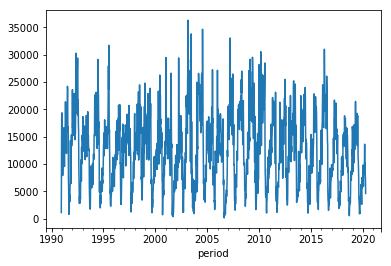

In [10]:
sorted_data['inc'].plot()

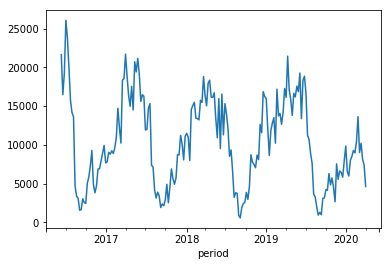

In [11]:
sorted_data['inc'][-200:].plot()

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

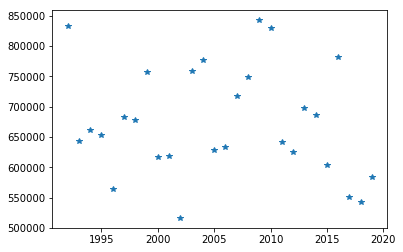

In [14]:
yearly_incidence.plot(style='*')

In [19]:
yearly_incidence == yearly_incidence.min()

1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002     True
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
dtype: bool